# Building a Classifier - Titanic Dataset (module 3)
**Author:** Jarred Gastreich 
**Date:** November, 14, 2025 
**Objective:** Predicting a Continuous target with regression using the seaborn Titanic dataset


In [81]:
# Imports

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Section 1: Import and Inspect the Data

In [82]:
# Load Titanic dataset from seaborn and verify
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Section 2: Data Exploration and Preparation

In [83]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)

titanic = titanic.dropna(subset=['fare'])

titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

C:\Users\jarre\AppData\Local\Temp\ipykernel_15380\1712063472.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


# Section 3: Feature Selection and Justification

In [84]:
# Case 1. age
X1 = titanic[['age']]
y1 = titanic['fare']

# Case 2. family_size
X2 = titanic[['family_size']]
y2 = titanic['fare']

# Case 3. age, family_size
X3 = titanic[['age', 'family_size']]
y3 = titanic['fare']

# Case 4. pclass
X4 = titanic[['pclass']]
y4 = titanic['fare']

## Section 3 Reflection

Why might these features affect a passenger’s fare: Family Size may affect the fare if there was a discount for packages. Age within a family may affect fare because there may be a discount for children under a certain age. Class may affect fare because the higher class cabins are likely more expensive.

List all available features: sex, pclass, survived, embarked, alone.

Which other features could improve predictions and why: Embarked town and pclass are likely to affect fare. Embarked town could affect fare because the cities are likely different distances which would cost different amount of fuel.

How many variables are in your Case 4: three

Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs: pclass: 1,2, and 3. These are good inputs because they are numerical and could affect the fare.

# Section 4: Train a Regression Model (linear regression)

In [85]:
#split data

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

In [86]:
# train and evaluate linear regression

lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions for Case 1
y1_pred_train = lr_model1.predict(X1_train)
y1_pred_test = lr_model1.predict(X1_test)

# Predictions for Case 2
y2_pred_train = lr_model2.predict(X2_train)
y2_pred_test = lr_model2.predict(X2_test)

# Predictions for Case 3
y3_pred_train = lr_model3.predict(X3_train)
y3_pred_test = lr_model3.predict(X3_test)

# Predictions for Case 4
y4_pred_train = lr_model4.predict(X4_train)
y4_pred_test = lr_model4.predict(X4_test)


In [87]:
#Report performance
print("=== Case 1: age ===")
print("Training R²:", r2_score(y1_train, y1_pred_train))
print("Test R²:", r2_score(y1_test, y1_pred_test))
print("Test RMSE:", mean_squared_error(y1_test, y1_pred_test) ** 0.5)
print("Test MAE:", mean_absolute_error(y1_test, y1_pred_test))
print()

print("=== Case 2: family_size ===")
print("Training R²:", r2_score(y2_train, y2_pred_train))
print("Test R²:", r2_score(y2_test, y2_pred_test))
print("Test RMSE:", mean_squared_error(y2_test, y2_pred_test) ** 0.5)
print("Test MAE:", mean_absolute_error(y2_test, y2_pred_test))
print()

print("=== Case 3: age + family_size ===")
print("Training R²:", r2_score(y3_train, y3_pred_train))
print("Test R²:", r2_score(y3_test, y3_pred_test))
print("Test RMSE:", mean_squared_error(y3_test, y3_pred_test) ** 0.5)
print("Test MAE:", mean_absolute_error(y3_test, y3_pred_test))
print()

print("=== Case 4: pclass ===")
print("Training R²:", r2_score(y4_train, y4_pred_train))
print("Test R²:", r2_score(y4_test, y4_pred_test))
print("Test RMSE:", mean_squared_error(y4_test, y4_pred_test) ** 0.5)
print("Test MAE:", mean_absolute_error(y4_test, y4_pred_test))

=== Case 1: age ===
Training R²: 0.009950688019452314
Test R²: 0.0034163395508415295
Test RMSE: 37.97164180172938
Test MAE: 25.28637293162364

=== Case 2: family_size ===
Training R²: 0.049915792364760736
Test R²: 0.022231186110131973
Test RMSE: 37.6114940041967
Test MAE: 25.02534815941641

=== Case 3: age + family_size ===
Training R²: 0.07347466201590014
Test R²: 0.049784832763073106
Test RMSE: 37.0777586646559
Test MAE: 24.284935030470688

=== Case 4: pclass ===
Training R²: 0.3005588037487471
Test R²: 0.3016017234169923
Test RMSE: 31.7873316928033
Test MAE: 20.653703671484056


## Section 4 Reflection

Compare the train vs test results for each:
The first 3 cases performed poorly and much smaller R^2 values. Case 4 performed better and had a bigger R^2 value.

Did Case 1 overfit or underfit? Explain: Underfit because train and test are both very low (0.0099 and 0.0034) which tells us age does not affect fare.

Did Case 2 overfit or underfit? Explain: Underfit because the test (0.0222) is still small although slightler higher than train which tells us it won't be too useful for the model.

Did Case 3 overfit or underfit? Explain: Underfit because combining age and family_size results in a small improvement, but the R^2 remains very low (0.0735). The model is too simple to learn patterns.

Did Case 4 overfit or underfit? Explain: Optimal Fit. This case is generalizing well. Test R^2 is slightly higher than training R2 and the RMSE/MAE are significantly better than the other cases.This tells us that pclass has a good affect on fare.

Adding Age

Did adding age improve the model: Only slightly and not directly. 

Propose a possible explanation (consider how age might affect ticket price, and whether the data supports that): The small improvement in R^2 suggests a weak linear relationship exists between age and the target variable. However, since the R^2 remains very low even after adding age, it's highly likely that the true relationship is non-linear  and cannot be accurately captured by the simple linear model used in these cases.


Worst

Which case performed the worst: age
How do you know: it has the lowest test R^2 of 0.0034

Do you think adding more training data would improve it (and why/why not): No, because the model seems to be too simple and is not a lack of data.


Best

Which case performed the best: pclass

How do you know: It has the higest Test R^2 of 0.3016 and lowest RMSE of 31.79 and MAE of 20.65
Do you think adding more training data would improve it (and why/why not): This model is already generalizing well and there may be an add that helps is slightly but I the values are already simple and numeric. There may be a benefit to tie to a cabin feature, for example.

# Section 5: Compare Alternative Models (Ridge, Elastic Net, Polynomial Regression)

In [88]:
## Section 5.1 Ridge Regression

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)
y_pred_ridge = ridge_model.predict(X4_test)

In [89]:
## Section 5.2 Elastic Net

elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)
y_pred_elastic = elastic_model.predict(X4_test)

In [90]:
## Section 5.3 Polynomial Regression

# Set up the poly inputs
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X4_train)
X_test_poly = poly.transform(X4_test)

# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y4_train)
y_pred_poly = poly_model.predict(X_test_poly)


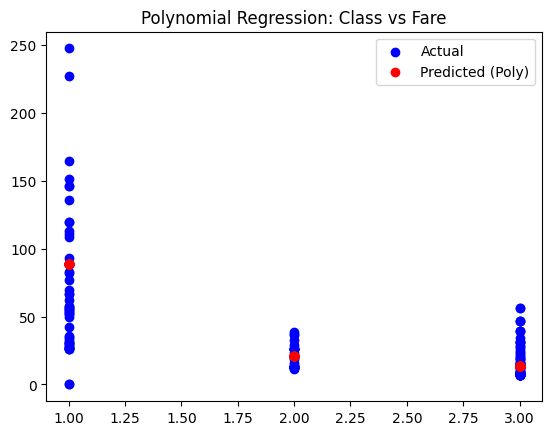

In [91]:
# visualize Polynomial Cubic Fit

plt.scatter(X4_test, y4_test, color='blue', label='Actual')
plt.scatter(X4_test, y_pred_poly, color='red', label='Predicted (Poly)')
plt.legend()
plt.title("Polynomial Regression: Class vs Fare")
plt.show()

## Section 5.4 Reflection

What patterns does the cubic model seem to capture: This was not the best visualization for pclass due to the 3 values but it does show that a cubic model is flexible and doesn't chart a straight line. 

Where does it perform well or poorly: It works well when there are outliers, for example for pclass 1. It seems to be accurate overall but may the visualization could be improved to see where most of the data falls in the 3rd class, for example because the predicted value seems lower than avg.

Did the polynomial fit outperform linear regression: Yes, it seemed to work better than linear whe nthere were outliers.

Where (on the graph or among which kinds of data points) does it fit best: It seems to fit best in class 1 but this may be due to the visualization where the charted data dots are too large to tell individual data points.

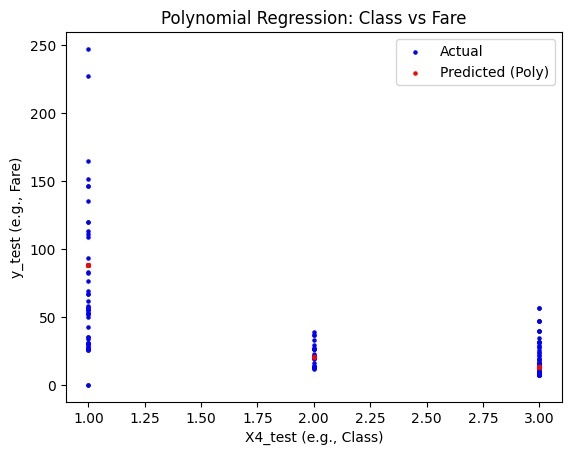

In [92]:
# Set up the poly inputs
poly = PolynomialFeatures(degree=7)
X_train_poly = poly.fit_transform(X4_train)
X_test_poly = poly.transform(X4_test)

# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y4_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Visualize Polynomial Cubic Fit

# Set the size of the actual and predicted points to a small value (e.g., s=5)
# Use a common size for both to make them equally small
small_size = 5

plt.scatter(X4_test, y4_test, color='blue', label='Actual', s=small_size)
plt.scatter(X4_test, y_pred_poly, color='red', label='Predicted (Poly)', s=small_size)

plt.legend()
plt.title("Polynomial Regression: Class vs Fare")
plt.xlabel("X4_test (e.g., Class)") # Added for clarity, you may need to adjust the label
plt.ylabel("y_test (e.g., Fare)")   # Added for clarity, you may need to adjust the label
plt.show()

## Section 5.5 Reflection

Which performed better? The visualizations for the higher order (7) looks very similar to the initial (3). I changed the plotted data points to be represented in small size. 

# Section 6: Final Thoughts & Insight

In [93]:
def report(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))  # compute RMSE manually
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"{name} R²: {r2:.3f}")
    print(f"{name} RMSE: {rmse:.2f}")
    print(f"{name} MAE: {mae:.2f}\n")

# Compare models
report("Linear", y1_test, y1_pred_test)
report("Ridge", y1_test, y_pred_ridge)
report("ElasticNet", y1_test, y_pred_elastic)
report("Polynomial", y1_test, y_pred_poly)

Linear R²: 0.003
Linear RMSE: 37.97
Linear MAE: 25.29

Ridge R²: 0.302
Ridge RMSE: 31.77
Ridge MAE: 20.64

ElasticNet R²: 0.339
ElasticNet RMSE: 30.92
ElasticNet MAE: 19.93

Polynomial R²: 0.336
Polynomial RMSE: 30.99
Polynomial MAE: 19.25



## 6.1 Summarize Findings

What features were most useful? Passenger Class

What regression model performed best? ElasticNet has the highest r^ value of 0.339 and the lowest root mean squared error of 30.92. THe Polynomial model had a slightly lower MAE of 19.25 compared t oElasticNet of 19.93.

How did model complexity or regularization affect results? The standard linear model performed very bad (0.003) which confirmed that features alone have almost no linear relationship with fare -- except for class. The polynomial model had a high performance but it was not better than ElasticNet (0.339 vs 0.336). This project showed that the best performing models are the ones that move beyond the simple linear model. The predictive power was best illustrated by the non-linear model or by the regularized linear model (ElasticNet) that handled noise well.

## 6.2 Reflection Discuss Challenges

Was fare hard to predict? Why?
Yes, because our initial assumptions turned out to be poor predictors. A combination of features helped a little, but it turns out that the most obvious predictor, class, was the only viable feature tested to affect fare.

Did skew or outliers impact the models? 
No, when visualizing the passenger class non-linear model, you can see that the outliers did not affect the model negatively.
